### 본 장은 '지도 학습의, 분류 문제'에 대한 "성능평가 지표"를 학습한다.

### 01. Accuracy(정확도)

In [1]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator  # 가장 기본 Estimator

In [2]:
aa=BaseEstimator() # 파라미터가 없는 추상적인 객체

In [3]:
# 간단한 분류 알고리즘 클래스 생성
# 간단한 알고리즘이지만, 정확도만 성능 평가지표로 삼으면 문제가 있을 수 있다.
class MyDummyClf(BaseEstimator):
# pass #재사용
    # fit()메소드를 정의(선언) : 아무것도 안한다.
    # X: 학습 데이터, y : 학습 데이터 답
    def fit(self, X, y=None):
        pass

    # X : 예측할 테스트데이터, 타이타닉 데이터프레임
    # 단순 성별로만 생존여부 예측한 함수 생성
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))  #np.zeros() => 0 으로 채워진 ndarray 생성. X를 저장할 수 있는 공간 생성
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

앞 장의 예제 함수 코드 가져오기

In [4]:
# Age, Cabin, Embarked, Fare의 Null 처리 함수
def fillna_(df):
    '''Age=> mean()'''
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    '''Cabin=> 'N' '''
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [5]:
# 불필요한 컬럼 제거 함수
def drop_feature(df): 
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [6]:
# Cabin, Sex, Embarked 레이블 인코딩 함수
# Cabin : C85 => C => 레이블 인코딩 진행 필요
from sklearn.preprocessing import LabelEncoder
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1] # Cabin: C85 =>
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
        
    return df

In [7]:
# 앞에서 선언한 함수를 다 적용하는 함수
def transform_features(df):
    df= fillna_(df)
    df= drop_feature(df)
    df= format_features(df)
    return df

 MyDummyClf 클래스 성능평가 하기

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터 로딩
titanic_df = pd.read_csv('../data/titanic_train.csv')

# 데이터와 답 분리
y_tit_df = titanic_df['Survived']  # 답
X_tit_df = titanic_df.drop('Survived', axis=1, inplace=False) # 데이터

# 데이터 전처리 (Null 채우기, 불필요한 컬럼제거, 숫자로 인코딩)
X_tit_df = transform_features(X_tit_df)

# 학습데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(
      X_tit_df  # 분리할 데이터
    , y_tit_df  # 분리할 답
    , test_size = 0.2
    , random_state = 11
)

# 1. 모델 객체 생성
myclf= MyDummyClf()

# 2. 학습
myclf.fit(X_train, y_train)

# 3. 예측값 추출
mypred = myclf.predict(X_test)

# 4. 정확도 계산
accu = accuracy_score(y_test, mypred)

print('정확도 : {0:.4f}'.format(accu))

정확도 : 0.8324


### 불균형한 데이터 정확도 예측, 성능 평가

In [9]:
# load_digits :  0~9 사이 값을 임의 생성
from sklearn.datasets import load_digits

In [10]:
digits = load_digits()
digits.data[0], digits.target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [11]:
# 불균형 데이터 생성
#  digit.target 값이 7인 경우를 예를 들어보겠다.
y=(digits.target==7).astype(int)
# digits.target ==7 => True.astype(int) =>1
# digits.target !=7 => False.astype(int) =>0

In [12]:
# 데이터와 답을 학습데이터와 테스트데이터로 분리
# 데이터 : digits.data
# 답: y (불균형 데이터)
X_train, X_test, y_train, y_test = \
train_test_split(
    digits.data  # 전체 데이터
    ,y  # 전체 답
    ,random_state=0
)

In [13]:
# 불균형한 레이블 데이터 분포확인
print('레이블 테스트 세트 크기', y_test.shape)
print('테스트 세트의 레이블 분포값')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 (450,)
테스트 세트의 레이블 분포값
0    402
1     48
dtype: int64


In [14]:
from sklearn.datasets import load_digits

class MyFakeClf(BaseEstimator):
    def fit(self, X,y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)   # zeros 이기 때문에 모두 0이고, dtype을 bool로 주었으므로 모두 False 가 됨.

In [15]:
# 모델 생성, 학습, 예측, 평가
fakeclf = MyFakeClf()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
accuracy_score(y_test, fakepred)

0.8933333333333333

In [16]:
a = zip(y_test, fakepred)

In [17]:
len(y_test), len(fakepred)

(450, 450)

아무런 fitting 을 하지않고, zero 값으로만 채운 predict 메서드를 사용하여도 정확도가 90% 가까이 나올수가 있다. 
즉 정확도 성능평가지표만을 고려하면, 잘못된 결과가 도출될수 있다

### 02. Confusion Matrix (오차행렬)
- 이진 분류(양성(Positive), 음성(Negative)을 판단)에서 중요한 성능지표

In [19]:
from sklearn.metrics import confusion_matrix

# y_test : 실제 답, fakepred: 예측 답
# 오차행렬 생성
confusion_matrix(y_test, fakepred)

array([[402,   0],
       [ 48,   0]], dtype=int64)

비대칭한 데이터세트에서 정확도는 수치적 판단오류를 일으킬수 있다 =>정밀도와 재현율도 고려해야한다.

### 03. 정밀도와 재현율

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [24]:
# 정확도, 오차행렬, 정밀도, 재현율
# 파라미터(재료) : 원래 답(y_test), 예측값(pred)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accu = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    print('오차 행렬')
    print(confusion)
    result = '정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'
    print(result.format(accu, precision, recall))


In [22]:
# LogisticRegression (이진분류 알고리즘)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
# 타이타닉 데이터 로딩, 가공, 데이터 분리
titanic_df = pd.read_csv('../data/titanic_train.csv')

# 답 데이터 추출
y_tit_df = titanic_df['Survived']

# 답을 제외한 데이터 추출
X_tit_df = titanic_df.drop('Survived', axis=1)

# 데이터 가공(전처리)
X_tit_df = transform_features(X_tit_df)

# 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(
     X_tit_df
    ,y_tit_df
    ,test_size=0.2
    ,random_state=0
)


In [26]:
# 모델 생성, 학습, 예측, 평가

# 모델 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train, y_train)

# 예측 
pred = lr_clf.predict(X_test)

# 평가
get_clf_eval(y_test, pred)

오차 행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

#### 정밀도/재현율 트레이드오프

In [28]:
len(X_test)

179

In [29]:
# 학습한 객체 : lr_clf (LogisticRegreesion 알고리즘으로 학습)

# pred_proba() : 개별 데이터별로 예측확률 얻기
# 179 X 2(2진 분류) ndarray return
pred_proba= lr_clf.predict_proba(X_test)

In [31]:
X_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
495,3,1,29.699118,0,0,14.4583,7,0


In [38]:
# 첫번째 데이터의 분류클래스별 예측확률
pred_proba[0]

array([0.85142564, 0.14857436])

- 즉 첫번째 데이터의 답이 0이될 확률은 85%, 1이 될 확률은 15% 이고, 임계값(Threshold)이 50%로 설정되어 있으므로 답은 0(Death)으로 판정될 것이다.
- 만약 각각 클래스의 확률의 50%에 가까운 값이 나올수록 판정의 오류 가능성이 커진다

- quantum 판정과 같은 논리로 이해하기(양자역학의 Probilities의 개념으로 이해할것)

In [35]:
# 위 설명대로 첫번째 데이터 예측값 0
pred[0]

0

In [36]:
# 첫번째 답은 0 
y_test.head(1)

495    0
Name: Survived, dtype: int64

즉 예측과 답이 일치

예측확률이 50% 에 가까운 경우를 보자. 즉 이 경우 판정 오류 가능성이 커질 것이다

In [44]:
pred_proba[5]

array([0.48989002, 0.51010998])

In [45]:
pred[5]

1

In [46]:
y_test[5]

0

이 경우 1의 예측확율이 51% 이기 때문에 1(Alive)라고 판정했지만, 실제는 0(Death)로 예측에 실패했다.

In [48]:
# 예측확률과 예측값 이어붙여서(concatenate) 한번에 보기
pred_proba_result = \
np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result[:10]

array([[0.85142564, 0.14857436, 0.        ],
       [0.89229418, 0.10770582, 0.        ],
       [0.93337015, 0.06662985, 0.        ],
       [0.05348106, 0.94651894, 1.        ],
       [0.31397445, 0.68602555, 1.        ],
       [0.48989002, 0.51010998, 1.        ],
       [0.082082  , 0.917918  , 1.        ],
       [0.06469936, 0.93530064, 1.        ],
       [0.41245641, 0.58754359, 1.        ],
       [0.29162866, 0.70837134, 1.        ]])

In [53]:
from sklearn.preprocessing import Binarizer

# 이진판정 클래스 Binarizer(threshold= )
bina = Binarizer(threshold=1.1)

X=[
     [1, -1, 2]
    ,[2, 0, 0]
    ,[0, 1.1, 1.2]
]

bina.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [55]:
# 온도 판정 예제
bina = Binarizer(threshold=38)

X=[
     [36.5, 36, 39]
    ,[36.5, 36, 37]
    ,[36.5, 36, 36]
]

bina.fit_transform(X)

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [59]:
pred_proba[0]

array([0.85142564, 0.14857436])

In [75]:

# 임계값 설정
custom_threshold = 0.5

# [행,열] => [:,1] : 모든 행의 1번 열만 가져와라.
# positive가 될 확률만 추출하여 2차원 ndarray 로 변경하기
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
pred_proba_1[:10]

array([[0.14857436],
       [0.10770582],
       [0.06662985],
       [0.94651894],
       [0.68602555],
       [0.51010998],
       [0.917918  ],
       [0.93530064],
       [0.58754359],
       [0.70837134]])

In [76]:
# 학습
 # fit 메서드의 파라미터는 배열이 되어야 한다.(위에서 2차원으로 변경한이유)
bina = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
# 변경
cust_pred = bina.transform(pred_proba_1)


In [77]:
print(cust_pred[:5])

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [78]:
get_clf_eval(y_test, cust_pred)

오차 행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


In [87]:
# Threshold를 파라미터로 갖는 함수 만들기
def get_clf_eval_by_threshold(y_test, pred_proba_p, thresholds):
    '''
    y_test : 원래 답
    pred_proba_p: 결과 확률값
    thresholds : 임계값 리스트
    '''
    for cust_th in thresholds:
        bina=Binarizer(threshold=cust_th).fit(pred_proba_p)
        cust_pred = bina.transform(pred_proba_p)
        print('현재 임계값: ' , cust_th)
        get_clf_eval(y_test, cust_pred)

In [88]:
# 테스트를 수행할 임계값을 리스트 객체에 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba_2 = pred_proba[:,1].reshape(-1, 1)

get_clf_eval_by_threshold(y_test, pred_proba_2, thresholds)

현재 임계값:  0.4
오차 행렬
[[86 24]
 [13 56]]
정확도: 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116
현재 임계값:  0.45
오차 행렬
[[91 19]
 [14 55]]
정확도: 0.8156, 정밀도 : 0.7432, 재현율 : 0.7971
현재 임계값:  0.5
오차 행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681
현재 임계값:  0.55
오차 행렬
[[97 13]
 [18 51]]
정확도: 0.8268, 정밀도 : 0.7969, 재현율 : 0.7391
현재 임계값:  0.6
오차 행렬
[[99 11]
 [25 44]]
정확도: 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377


In [89]:
from sklearn.metrics import precision_recall_curve

# 답이 1일때의 예측 확률 추출
pred_proba_v = lr_clf.predict_proba(X_test)[:,1]

# precision_recall_curve() : 1.정밀도와, 2.재현율, 3.적용된 threshold 를 튜플형태로 반환하는 메소드(threshold: 0.11~0.95사이)
# 테스트데이터의 답(y_test), 예측확률(pred_proba_v)을 파라미터로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_v)

In [92]:
len(y_test), len(thresholds)

(179, 166)

In [96]:
thresholds.shape

(166,)

In [98]:
# 반환된 임계값이 166건 => 10건만 추출하기
thr_index = np.arange(0, thresholds.shape[0], 16)
thr_index  # 해당 임계값들로만 적용해서 정밀도와 재현율을 확인할 것이다.

array([  0,  16,  32,  48,  64,  80,  96, 112, 128, 144, 160])

In [99]:
# 정밀도: precisions, 팬시 인덱싱
precisions[thr_index]

array([0.39884393, 0.42038217, 0.47058824, 0.53781513, 0.61764706,
       0.6744186 , 0.74285714, 0.81481481, 0.89473684, 1.        ,
       1.        ])

In [100]:
recalls[thr_index]

array([1.        , 0.95652174, 0.92753623, 0.92753623, 0.91304348,
       0.84057971, 0.75362319, 0.63768116, 0.49275362, 0.31884058,
       0.08695652])

In [102]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [123]:
# precision_recall_curve 함수를 시각화하는 함수 만들기
# y_test : 테스트데이터 답, pred_proba_p : 예측확률
def precision_recall_curve_plot(y_test, pred_proba_p):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_p)
    
    # x축을 threshold값, Y축은 정밀도, 재현율 값
    # 정밀도 : 점선으로 표시
    
    plt.figure(figsize=(8,6))
    thres_boundary = thresholds.shape[0]
    
    # 정밀도
    plt.plot(
          thresholds  # X 축에 들어갈 값: 임계값
        , precisions[0:thres_boundary] # y축에 들어갈 값
        , linestyle='--'  # 점선
        , label='precision' # 범례
    )
    
    # 재현율
    plt.plot(
          thresholds  # X 축에 들어갈 값: 임계값
        , recalls[0:thres_boundary] # y축에 들어갈 값
        #, linestyle='--'  # 점선
        , label='recall' # 범례
    )
    # X축의 scale을 0.1 단위로 변경
    # X축의 범위값 조정 함수 : xlim()
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # y축 라벨, x축 라벨
    plt.xlabel('Threshold value')
    plt.ylabel('Precision/Recall value')
    
    # 범례 표시
    plt.legend()
    # 그리드 표시
    plt.grid()
    
    plt.show()

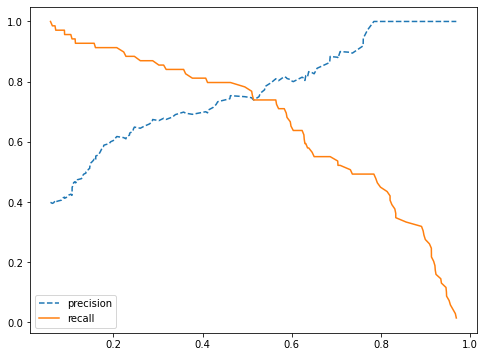

In [113]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

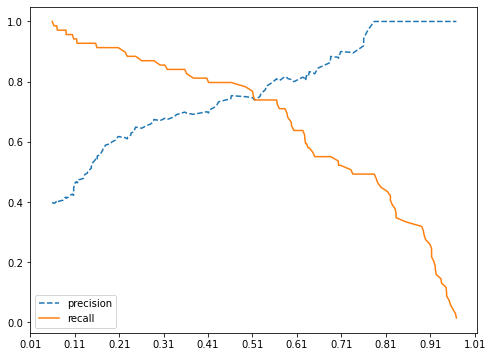

In [115]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

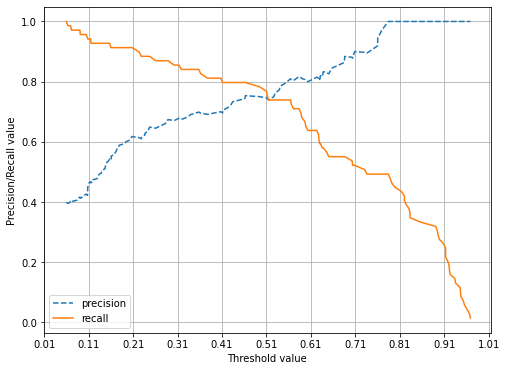

In [124]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### 04. F1 스코어

In [126]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
# 정밀도, 재현율 조합 평균
f1

0.7571428571428571

In [129]:
# 정확도, 오차행렬, 정밀도, 재현율, F1 스코어
# 파라미터(재료) : 원래 답(y_test), 예측값(pred)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accu = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    
    #F1-Score 
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    result = '정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}'
    print(result.format(accu, precision, recall, f1))


In [130]:
# 테스트를 수행할 임계값을 리스트 객체에 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)

get_clf_eval_by_threshold(y_test, pred_proba, thresholds)

현재 임계값:  0.4
오차 행렬
[[86 24]
 [13 56]]
정확도: 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116, F1:0.7517
현재 임계값:  0.45
오차 행렬
[[91 19]
 [14 55]]
정확도: 0.8156, 정밀도 : 0.7432, 재현율 : 0.7971, F1:0.7692
현재 임계값:  0.5
오차 행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681, F1:0.7571
현재 임계값:  0.55
오차 행렬
[[97 13]
 [18 51]]
정확도: 0.8268, 정밀도 : 0.7969, 재현율 : 0.7391, F1:0.7669
현재 임계값:  0.6
오차 행렬
[[99 11]
 [25 44]]
정확도: 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377, F1:0.7097


### 05. ROC Curve 와 AUC 점수
- 이진 분류의 예측 성능 측정에서 중요한 성능지표
- 모든 분류 임계값에서 분류 모델의 성능을 보여주는 그래프

In [131]:
# roc_curve()
from sklearn.metrics import roc_curve

In [135]:
# 1의 예측 확률
pred_proba_v = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, ths = roc_curve(
      y_test
    , pred_proba_v
)

In [140]:
len(ths)

52

In [144]:
# ROC Curve Chart function
def roc_curve_plot(y_test, pred_proba_p):
    fprs, tprs, ths = roc_curve(y_test, pred_proba_p)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.legend()
    plt.grid()
    plt.show()

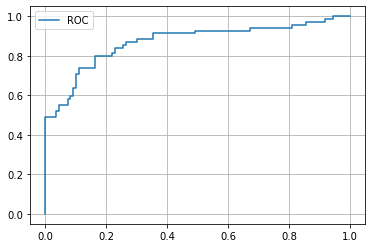

In [145]:
roc_curve_plot(y_test, pred_proba_v)

In [147]:
# AUC score
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
roc_score

0.8022397891963109